In [ ]:
# vim: set filetype=python:

# Demo: Linear Classification with Automatic Relevance Determination

In this notebook we compare perfomance of L1,L2, ARD Logistic Regression on data set with noisy features.
As you can see from demo example below, best results are achieved by version of Logistic Regression with ARD and with L1 penalisation. These methods drive coefficients for most of irrelevant features to zero.

In small simulation study (at the end of this notebook) Logistic Regression with ARD prior had nearly two times smaller misclassification rate than L1 version, more interestingly only in 4 out of 100 simulations ARD perfomance 
on test set was worse than L1. 

##scikit-learn API

In [1]:
from fast_scikit_rvm import ClassificationARD
from sklearn.utils.estimator_checks import check_estimator
check_estimator(ClassificationARD)
print "Passed scikit-learn tests"


Passed scikit-learn tests


## Demo example

Logistic Regression L1 0.02 misclassification rate
Logistic Regression L2 0.295 misclassification rate
ARD Classification 0.0 misclassification rate


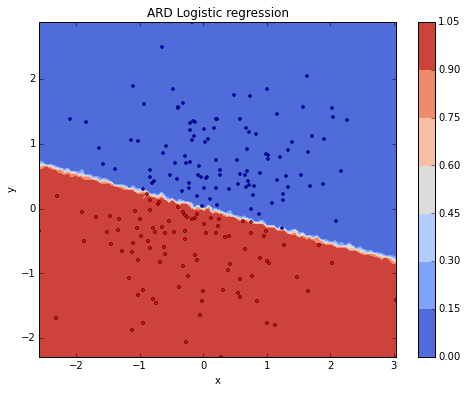

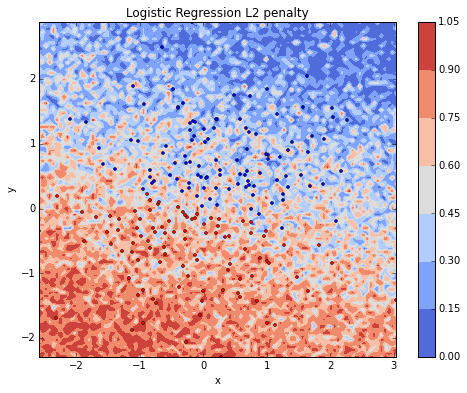

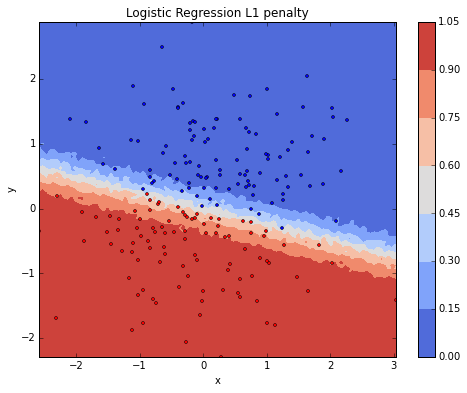

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from fast_scikit_rvm import ClassificationARD
import time
%matplotlib inline


# Parameters of the example
n_samples, n_features = 1000, 1200
# Create Gaussian data
np.random.seed(0)
X = np.random.randn(n_samples, n_features)
# Create weigts
lambda_ = 100
w = np.zeros(n_features)
# Only 2 relevant features (so that we can vizualise)
relevant_features = np.random.randint(0, n_features, 2)
for i in relevant_features:
   w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create the target
y = np.dot(X, w) + 10
y_hat  = np.ones(y.shape[0])
y_hat[y < 10] = -1
X,x,Y,y = train_test_split(X,y_hat, test_size = 0.2)

# logistic regression
lrl2 = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], penalty = 'l2')
lrl1 = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], penalty = 'l1',
                            solver = 'liblinear')
clf_ard = ClassificationARD()

lrl2.fit(X,Y)
lrl1.fit(X,Y)
clf_ard.fit(X,Y)

n_grid = 100
max_x      = np.max(x[:,relevant_features],axis = 0)
min_x      = np.min(x[:,relevant_features],axis = 0)
X1         = np.linspace(min_x[0],max_x[0],n_grid)
X2         = np.linspace(min_x[1],max_x[1],n_grid)
x1,x2      = np.meshgrid(X1,X2)
Xgrid      = np.zeros([n_grid**2,2])
Xgrid[:,0] = np.reshape(x1,(n_grid**2,))
Xgrid[:,1] = np.reshape(x2,(n_grid**2,))
Xg         = np.random.randn(n_grid**2,n_features)
Xg[:,relevant_features[0]] = Xgrid[:,0]
Xg[:,relevant_features[1]] = Xgrid[:,1]

blr_grid  = clf_ard.predict_proba(Xg)[:,1]
lrl2_grid = lrl2.predict_proba(Xg)[:,1]
lrl1_grid = lrl1.predict_proba(Xg)[:,1]
a1,a2     = relevant_features
titles = ["ARD Logistic regression","Logistic Regression L2 penalty",
          "Logistic Regression L1 penalty"]
models  = [blr_grid,lrl2_grid,lrl1_grid]

print "Logistic Regression L1 {0} misclassification rate".format(float(np.sum(y!=lrl1.predict(x))) / x.shape[0])
print "Logistic Regression L2 {0} misclassification rate".format(float(np.sum(y!=lrl2.predict(x))) / x.shape[0])
print "ARD Classification {0} misclassification rate".format(float(np.sum(y!=clf_ard.predict(x))) / x.shape[0])

for title,model in zip(titles,models):
   plt.figure(figsize=(8,6))
   plt.contourf(X1,X2,np.reshape(model,(n_grid,n_grid)),cmap="coolwarm")
   plt.plot(x[y==-1,a1],x[y==-1,a2],"bo", markersize = 3)
   plt.plot(x[y==1,a1],x[y==1,a2],"ro", markersize = 3)
   plt.colorbar()
   plt.title(title)
   plt.xlabel("x")
   plt.ylabel("y")
   plt.show()

## Simulations

In [3]:
# Parameters of the example (note in training n_features = n_samples)
test_size             = 0.2
n_samples, n_features = 1000, 800
n_simulations         = 100
lambda_               = 4



err_l1,err_ard,err_l2 = [],[],[]

for i in range(n_simulations):

   # Create Gaussian data
   X = np.random.randn(n_samples, n_features)
   # Create weigts
   w = np.zeros(n_features)
   # Only keep 20 weights of interest
   relevant_features = np.random.randint(0, n_features, 20)
   for i in relevant_features:
      w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
   # Create the target
   y = np.dot(X, w) + 10
   y_hat  = np.ones(y.shape[0])
   y_hat[y < 10] = -1
   X,x,Y,y = train_test_split(X,y_hat, test_size = test_size)

   # logistic regression
   lrl2 = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], penalty = 'l2')
   lrl1 = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], penalty = 'l1',
                            solver = 'liblinear')
   clf_ard = ClassificationARD()

   lrl2.fit(X,Y)
   lrl1.fit(X,Y)
   clf_ard.fit(X,Y)
   err_l1.append(float(np.sum(y!=lrl1.predict(x))) / x.shape[0])
   err_l2.append(float(np.sum(y!=lrl2.predict(x))) / x.shape[0])
   err_ard.append(float(np.sum(y!=clf_ard.predict(x))) / x.shape[0])



Logistic Regression L2 average error is 0.2592
Logistic Regression L1 average error is 0.0504
Logistic Regression with ARD prior averge error is 0.02495


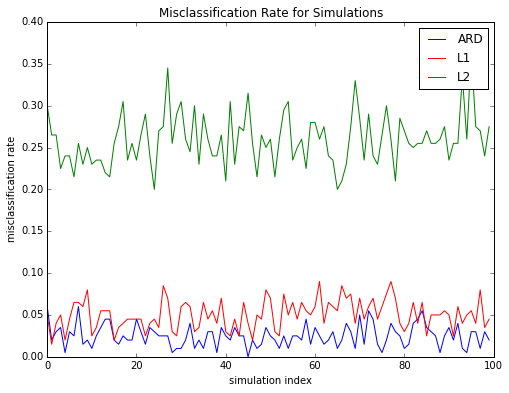

In [8]:
print "Logistic Regression L2 average error is {0}".format(np.mean(err_l2))
print "Logistic Regression L1 average error is {0}".format(np.mean(err_l1))
print "Logistic Regression with ARD prior averge error is {0}".format(np.mean(err_ard))
plt.figure(figsize = (8,6))
plt.plot(err_ard,'b-', label = 'ARD')
plt.plot(err_l1,'r-', label = 'L1')
plt.plot(err_l2,'g-', label = 'L2')
plt.xlabel('simulation index')
plt.ylabel('misclassification rate')
plt.title('Misclassification Rate for Simulations')
plt.legend(loc = 1)
plt.show()


In [11]:
np.sum(np.array(err_l1) - np.array(err_ard) < 0)

4

Only in 4 out of 100 cases Logistic Regression with ARD prior performed worse than Logistic Regression with L1 penalty